# Customising matplotlib output

## Overview:
- **Teaching:** 10 min
- **Exercises:** 10 min

**Questions**
* How can I customise my plot?
* How can I make the graph look the way I want it to?
* What other features does matplotlib have?

**Objectives**
* Learn how to change the limits on plot axes.
* Change the line colours and styles.
* Change the ticks and tick labels on axes.
* See how a graph can be annotated and customised.
* Save a graph as an image.

## Making it better

Previous page we saw how we could plot the sinc function and from data in a dataframe, and we customised it by adding axes labels and a title. 

This is good practise, but what if we want to modify the graph itself?  Maptplotlib has a rich feature set which we will explore in the following examples.  First lets set up matplotlib:

In [1]:
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

We can make use of the same feature set with numpy:

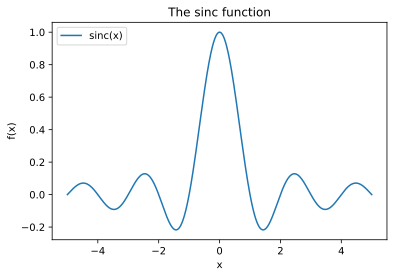

In [2]:
import numpy as np


x = np.linspace(-5, 5, 1000)
# sinc(x) is defined to be sin(pi*x)/(pi*x) in numpy
y_sinc = np.sinc(x)

plt.plot(x, y_sinc, label='sinc(x)')

# Set title and legend, then show plot
plt.title('The sinc function')
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

## Setting limits

Sinc(x) is bounded above and below by the two functions
$$\frac{1}{\pi x} \text{ and } \frac{-1}{\pi x}$$

We can add these to the plot by making two further NumPy arrays. Notice we have to mask the arrays, this just prevents us plotting over the asymptote. If you don't like maths, bear with me, we'll be back to the plotting soon!

In [3]:
# sinc(x) bounded by plus/minus 1/(pi*x)
y_above = 1/(np.pi*x)
y_below = -1/(np.pi*x)

# mask out very large values
y_above = np.ma.masked_outside(y_above, -60, 60)
y_below = np.ma.masked_outside(y_below, -60, 60)

We can then plot all three sets of y values on the same axes as follows:

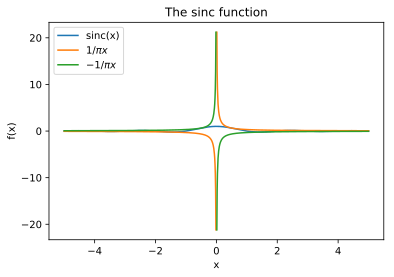

In [4]:
plt.plot(x, y_sinc, label='sinc(x)')
plt.plot(x, y_above, label='$1/\pi x$')
plt.plot(x, y_below, label='$-1/\pi x$')

# Set title and legend, then show plot
plt.title('The sinc function')
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

However, we seem to have lost the shape of the sinc function and all we can see is the new functions we have plotted. We can fix this by setting what the limits on the x and y axes are. This is done with the `xlim` and `ylim` functions respectively.

## Information: Editing cells, again
If you are following along with this material in a notebook, recall you can edit a cell and execute it again.
In this lesson, you can just keep modifying the input to the code block you use for plotting and re-execute the cell, rather than making a new cell for each modification.

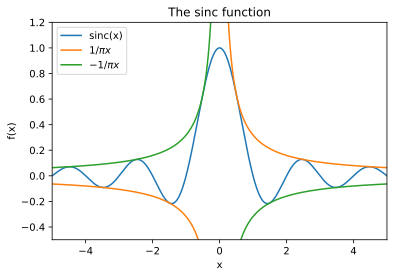

In [5]:
plt.plot(x, y_sinc, label='sinc(x)')
plt.plot(x, y_above, label='$1/\pi x$')
plt.plot(x, y_below, label='$-1/\pi x$')

# Set new limits
plt.xlim(-5, 5)
plt.ylim(-0.5, 1.2)

# Set title and legend, then show plot
plt.title('The sinc function')
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Now we can see the sinc function again. Notice alse that the sinc function touces both edges of the graph and is no longer floating in the center.

## Changing colours and line widths

We can also change the colours and style of the lines we use in the plot. We can do this explicitly using the keyword arguments `color`, `linewidth` and `linestyle` or with format strings, which are documented [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot). Now the important sinc function is bolder than the bounding lines and the positive and negative bounds are different colours.

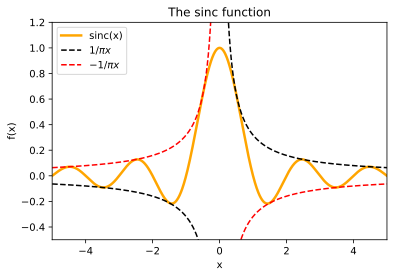

In [6]:
plt.plot(x, y_sinc, label='sinc(x)', color="orange", linewidth=2.5, linestyle="-")
plt.plot(x, y_above, 'k--',label='$1/\pi x$')
plt.plot(x, y_below, 'r--', label='$-1/\pi x$')

# Set limits
plt.xlim(-5, 5)
plt.ylim(-0.5, 1.2)

# Set title and legend, then show plot
plt.title('The sinc function')
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

## Setting ticks

Currently there are only x ticks at the even integers, and the y ticks are quite dense. If we want more or fewer ticks we can use the `xticks` and `yticks` functions.

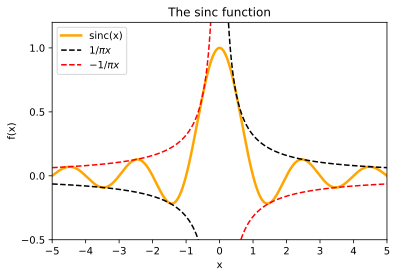

In [7]:
plt.plot(x, y_sinc, label='sinc(x)', color="orange", linewidth=2.5, linestyle="-")
plt.plot(x, y_above, 'k--',label='$1/\pi x$')
plt.plot(x, y_below, 'r--', label='$-1/\pi x$')

# Set limits
plt.xlim(-5, 5)
plt.ylim(-0.5, 1.2)

# Set ticks
plt.xticks(range(-5,6))
plt.yticks([-0.5, 0, 0.5, 1])

# Set title and legend, then show plot
plt.title('The sinc function')
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

## Information: Setting tick labels

When we set tick values, we can also provide a corresponding label in the second argument list. We can even use LaTeX to allow for nice rendering of the label. This is useful for trigonometric functions where we might want axis labels that are multiples of $\pi$. For example:
```python
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
```
.

## Exercise: Customising pandas plots
Pandas plots can be customised in exactly the same way, using your solution to the Summer Climate exercise on the previous page, make the following changes

- Using the temperature dataset, set the colours of the July and January lines to a warm colour and a cool colour.
- Add in the yearly average column to the plot with a dashed line style.
- (Harder) Add an annotation to one of the spikes in the data. Make sure the label is placed nicely.

Hint: you can get the year and temperature for a spike using:
```python
warm_winter_year = df['JAN'].idxmax()
warm_winter_temp = df['JAN'].max()
```
- Save the figure to a file and display it in your Jupyter notebook.

[Solution]()

## Solution: Customising pandas plots
Full working code for this exercise is
```python
import pandas as pd

# Import the data 
csv_file = 'cetml1659on.dat'
df = pd.read_csv(csv_file, # file name
                 skiprows=6,  # skip header
                 sep='\s+',  # whitespace separated
                 na_values=['-99.9', '-99.99']  # NaNs
                )

# Plot the January and June values
df['JAN'].plot(color='cyan')
df['JUN'].plot(color='orange')
df['YEAR'].plot(color='black', linestyle=':')

# Add a title and axes labels
plt.title('Summer, Winter and average Climate Plots')
plt.xlabel('Year')
plt.ylabel('Temperature ($^\circ$C)')

# Add a legend
plt.legend()

# Find warm winter year point
warm_winter_year = df['JAN'].idxmax()
warm_winter_temp = df['JAN'].max()

# Annotate plot
plt.annotate('A warm winter',
             xy=(warm_winter_year, warm_winter_temp),
             xytext=(-150, -100), textcoords='offset points', fontsize=14,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.savefig('fancy_summer_climate.png')
# display with ![](fancy_summer_climate.png)
```
This produces the figure:
![](../images/fancy_summer_climate.png)


## Moving spines - Back to sinc ...

Our plotting routine is begining to get more complicated. What follows is designed to show you what is possible and give a reference you can come back to. Feel free to follow along, or just read through the next part just to see what is possible.

Spines are the lines connecting the axis tick marks and noting the boundaries of the data area. They can be placed at arbitrary positions and until now, they were on the border of the axis. Sometimes it is useful to have them in the middle. Since there are four of them (top/bottom/left/right), we’ll discard the top and right by setting their colour to none and we’ll move the bottom and left ones to coordinate 0 in data space coordinates.

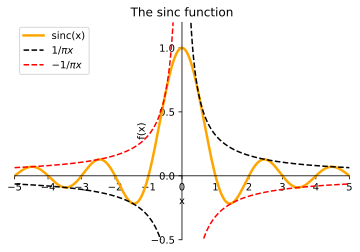

In [8]:
plt.plot(x, y_sinc, label='sinc(x)', color="orange", linewidth=2.5, linestyle="-")
plt.plot(x, y_above, 'k--',label='$1/\pi x$')
plt.plot(x, y_below, 'r--', label='$-1/\pi x$')

# Set limits
plt.xlim(-5, 5)
plt.ylim(-0.5, 1.2)

# Set ticks
plt.xticks(range(-5,6))
plt.yticks([-0.5, 0, 0.5, 1])

# Move the axis spines
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

# Set title and legend, then show plot
plt.title('The sinc function')
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In our case the tick labels are now overlapping with the function we have plot, which is a bit of a problem. We can either change the plot back or modify things further.

## Annotate some points

We can annotate some interesting points on the graph using the `annotate` function. We choose the first positive x value where sinc(x) is equal to $1/\pi x$ and $-1/\pi x$. This is done by first drawing a marker on the curve as well as a straight dotted line. Then, we’ll use the annotate command to display some text with an arrow.

We also fix our tick labels, by introducing the `zorder` keyword argument, which controls the order in which things are drawn (lower zorder means drawn underneath items with a higher zorder). To make the tick labels stand out even more, we can apply a semi-transparent background (so we can still see the lines passing underneath) and increase the font size.

There are also a few more tweaks to tidy the plot up, like moving the axes labels.

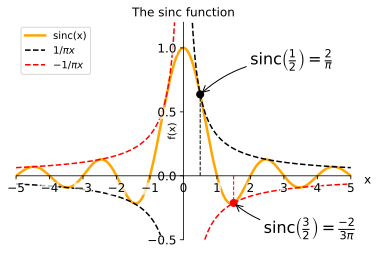

In [9]:
# NB: We had to introduce a zorder parameter here
plt.plot(x, y_sinc, label='sinc(x)', color="orange", linewidth=2.5, linestyle="-", zorder=0)
plt.plot(x, y_above, 'k--',label='$1/\pi x$', zorder=0.1)
plt.plot(x, y_below, 'r--', label='$-1/\pi x$', zorder=0.1)

# Set limits
plt.xlim(-5, 5)
plt.ylim(-0.5, 1.2)

# Set ticks
plt.xticks(range(-5,6))
plt.yticks([-0.5, 0, 0.5, 1])

# Move the axis spines
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

# Annotate the graph
t = 0.5
plt.plot([t, t], [0, np.sinc(t)], color='black', linewidth=1, linestyle="--")
plt.scatter([t], [np.sinc(t)], 50, color='black')

plt.annotate(r'sinc$\left(\frac{1}{2}\right)=\frac{2}{\pi}$',
             xy=(t, np.sinc(t)), xycoords='data',
             xytext=(50, 30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

s = 1.5
plt.plot([s, s],[0, np.sinc(s)], color='red', linewidth=1, linestyle="--")
plt.scatter([s],[np.sinc(s)], 50, color='red')

plt.annotate(r'sinc$\left(\frac{3}{2}\right)=\frac{-2}{3\pi}$',
             xy=(s, np.sinc(s)), xycoords='data',
             xytext=(30, -30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"))

# Increase the size of the tick labels in both axes
# and apply semi-transparent background
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)
    label.set_bbox(dict(facecolor='white', edgecolor='none', pad=0.2, alpha=0.7))
    
# Set title and legend, then show plot
plt.title('The sinc function')
plt.legend(loc='upper left')
plt.xlabel('x', labelpad=-20, x=1.05, fontsize=12)
plt.ylabel('f(x)', labelpad=-30)
plt.show()

Now you can really customise your plots!

## Information: Fiddle until it is right
The original source of this section is inspired by Nicolas P. Rougier's [tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/), which is linked to from matplotlib's own website. The last few tricks for sorting out the spines on the graph no longer work in the latest versions of matplotlib. As a result in Chrys Woods' [tutorial](https://chryswoods.com/python_and_data/) this step is omitted and the graph they save has the spines on the outside, avoiding the issue.

The way to get tick labels to draw on top of plot lines is to use the `zorder` keyword argument, but this isn't so obvious from documentation. We mention this here as a useful reference, and to also show that tweaking your plot to look just right can be tricky, but worth the perseverance.

## Saving plot to a file

You can take any plot you've created within jupyter and save it to a file on disk using the `plt.savefig()` function. You give the function the name of the file to create and it will use whatever format is specified by the name. This is useful if you want to use the plot outside of jupyter. It is also possible to generate plots like this in the terminal, where it may be preferable to save straight to disk.

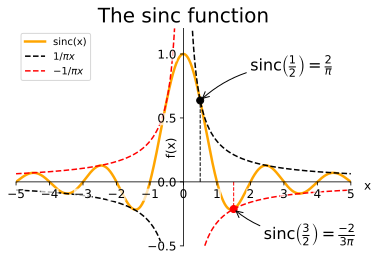

In [10]:
# NB: We had to introduce a zorder parameter here
plt.plot(x, y_sinc, label='sinc(x)', color="orange", linewidth=2.5, linestyle="-", zorder=0)
plt.plot(x, y_above, 'k--',label='$1/\pi x$', zorder=0.1)
plt.plot(x, y_below, 'r--', label='$-1/\pi x$', zorder=0.1)

# Set limits
plt.xlim(-5, 5)
plt.ylim(-0.5, 1.2)

# Set ticks
plt.xticks(range(-5,6))
plt.yticks([-0.5, 0, 0.5, 1])

# Move the axis spines
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

# Annotate the graph
t = 0.5
plt.plot([t, t], [0, np.sinc(t)], color='black', linewidth=1, linestyle="--")
plt.scatter([t], [np.sinc(t)], 50, color='black')

plt.annotate(r'sinc$\left(\frac{1}{2}\right)=\frac{2}{\pi}$',
             xy=(t, np.sinc(t)), xycoords='data',
             xytext=(50, 30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

s = 1.5
plt.plot([s, s],[0, np.sinc(s)], color='red', linewidth=1, linestyle="--")
plt.scatter([s],[np.sinc(s)], 50, color='red')

plt.annotate(r'sinc$\left(\frac{3}{2}\right)=\frac{-2}{3\pi}$',
             xy=(s, np.sinc(s)), xycoords='data',
             xytext=(30, -30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"))

# Increase the size of the tick labels in both axes
# and apply semi-transparent background
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)
    label.set_bbox(dict(facecolor='white', edgecolor='none', pad=0.2, alpha=0.7))
    
# Set title and legend, then SAVE plot
plt.title('The sinc function', fontsize=20)
plt.legend(loc='upper left')
plt.xlabel('x', labelpad=-20, x=1.05, fontsize=12)
plt.ylabel('f(x)', labelpad=-30, y=0.45, fontsize=12)
#plt.show()

# Save final plot
plt.savefig('../images/sinc.png')
#You don't need to save in this folder you could just use:
#plt.savefig('sinc.png')

You can then display the figure in jupyter with `![](sinc.png)`

![](../images/sinc.png)

## Exercise: Sine and cosine

Recreate a similar plot to the one above, but using the sine and cosine functions plotted over the range $-\pi$ to $\pi$, available in NumPy as `np.sin` and `np.cos`.

[Solution]()

## Solution: Sine and cosine
Complete code for this solution looks like:
```python
import numpy as np
import matplotlib.pyplot as plt

# Data to plot
x = np.linspace(-np.pi, np.pi, 700)
y_sin = np.sin(x)
y_cos = np.cos(x)

# NB: We had to introduce a zorder parameter here
plt.plot(x, y_cos, label='sin(x)', color="blue", linewidth=2.5, linestyle="-", zorder=0)
plt.plot(x, y_sin, label='cos(x)', color="red", linewidth=2.5, linestyle="-", zorder=0)

# Set limits
plt.xlim(-np.pi, np.pi)
plt.ylim(-1.1, 1.1)

# Set ticks and labels
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
           [r'$-1$', r'$0$', r'$+1$'])

# Move the spines
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

# Annotate the graph
t = 2 * np.pi / 3
plt.plot([t, t], [0, np.cos(t)], color='blue', linewidth=2.5, linestyle="--")
plt.scatter([t, ], [np.cos(t), ], 50, color='blue')

plt.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t, t],[0, np.sin(t)], color='red', linewidth=2.5, linestyle="--")
plt.scatter([t, ],[np.sin(t), ], 50, color='red')

plt.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), xycoords='data',
             xytext=(+30, 0), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

# Increase the size of the tick labels in both axes
# and apply semi-transparent background
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)
    label.set_bbox(dict(facecolor='white', edgecolor='none', pad=0.2, alpha=0.7))

# Set title and legend, then SAVE plot
plt.title('The sine and cosine functions', fontsize=20)
plt.legend(loc='upper left')
plt.xlabel('x', labelpad=-20, x=1.05, fontsize=12)
plt.ylabel('f(x)', labelpad=-20, y=0.7, fontsize=12)
#plt.show()

plt.savefig('cos_sin.png')
```
The code produces the figure:
![](../images/cos_sin.png)

## Key Points:
* The limits on plot axes can be changed with `xlim` and `ylim`.
* Keyword arguments can be used to change line colours and styles.
* Alternatively format strings can be used as a shortcut.
* Ticks and tick labels are changed with `xticks` and `yticks`.
* A graph can be annotated and almost every element moved.
* `savefig` saves the figure that we generate as an image.